In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['children'].value_counts())
print(data['region'].value_counts())


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Converting Catagorical data to numerical data / Encoding

In [6]:
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Exporatory Data Analysis

#### Uni varient Analysis-When Single variable is analysed at once time

Text(0, 0.5, 'Frequency of each age')

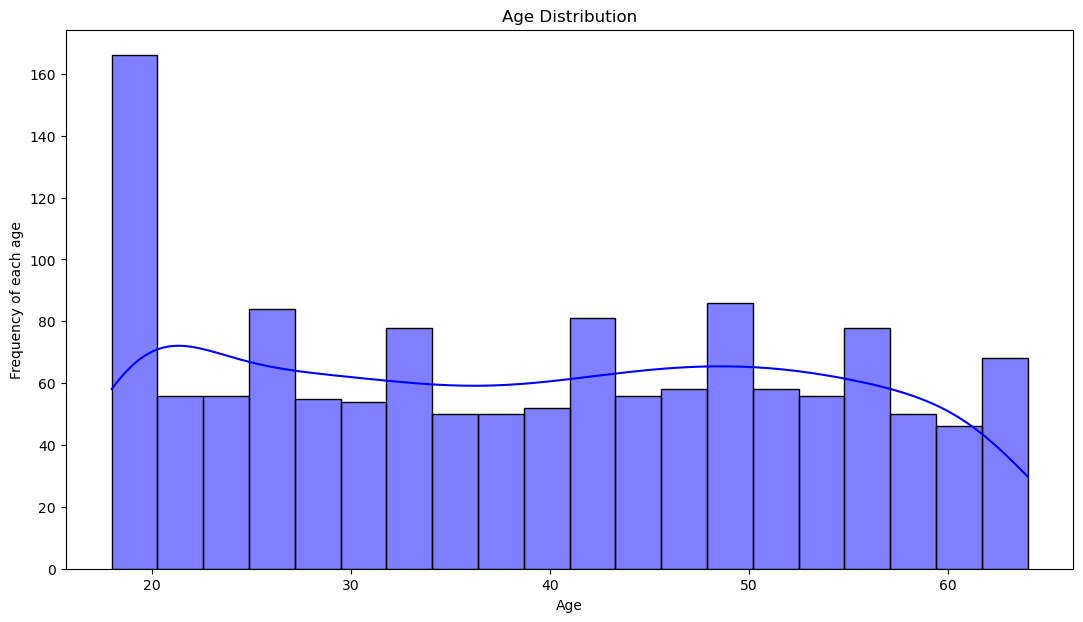

In [7]:
plt.figure(figsize=(13,7))
sns.histplot(data.age,bins=20,kde=True,color='blue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel("Frequency of each age")

#### Max people in the above data set are of the age 19 to 20 with a count of 165 or 170

<Axes: xlabel='sex', ylabel='count'>

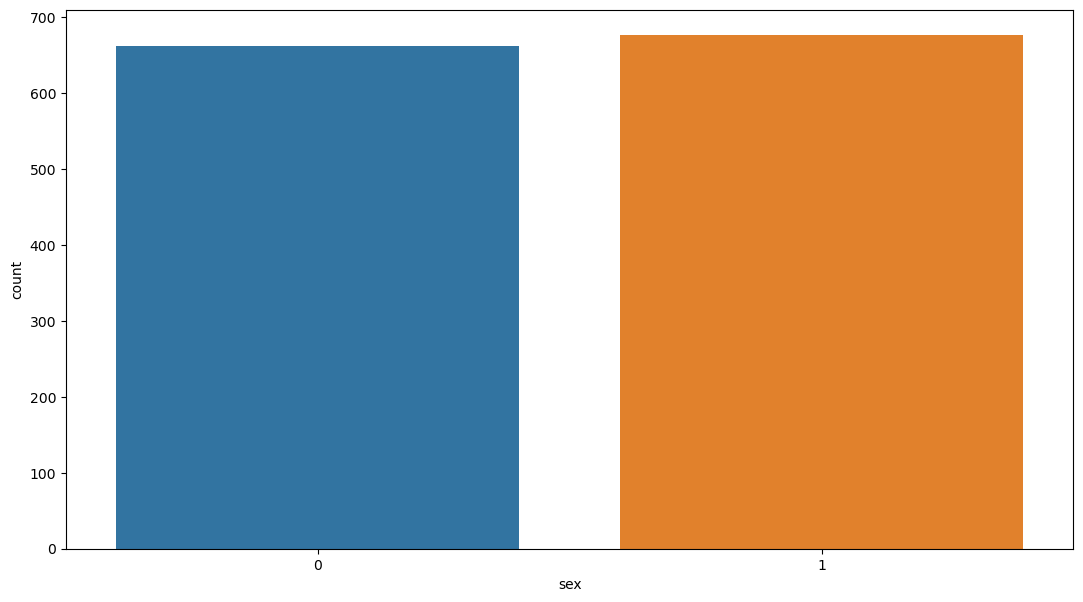

In [8]:
plt.figure(figsize=(13,7))
sns.countplot(x='sex',data = data)

#### Both the count of male and female almost equal

Text(0, 0.5, 'Frequency of each bmi')

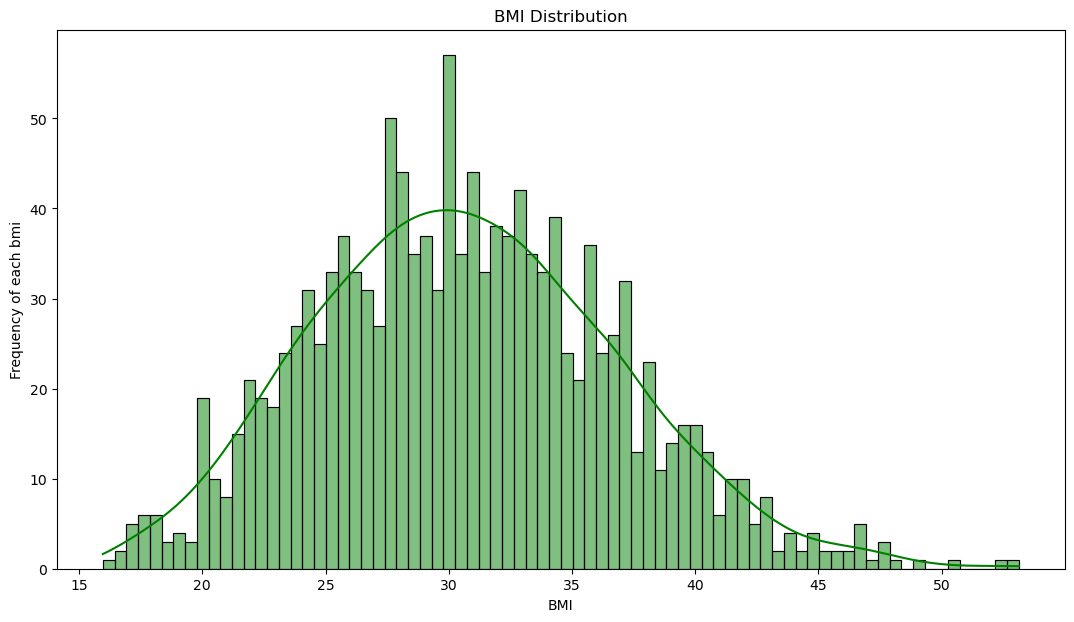

In [9]:
plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins=78,kde=True,color='green')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel("Frequency of each bmi")

#### Majority of people have BMI between 25 and 40, which is considered an overweight and could be a major factor in increased medical charges

Text(0, 0.5, 'Distribution of Charges')

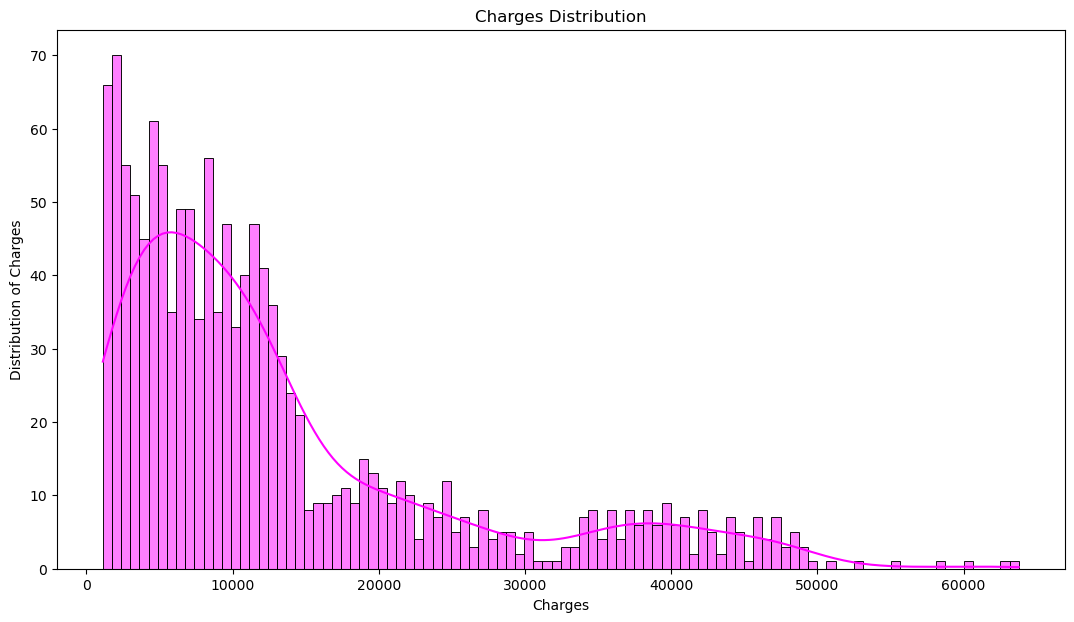

In [10]:
plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins=100,kde=True,color='magenta')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel("Distribution of Charges")

#### Its is a left skwed graph with mean lying somehwere to the left side of the graph approximalty equal to 13270.42 Also there lies more number of  people having their charges between the range of 2000 to 12000

In [11]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### Bi-variate Analysis

<Figure size 1300x700 with 0 Axes>

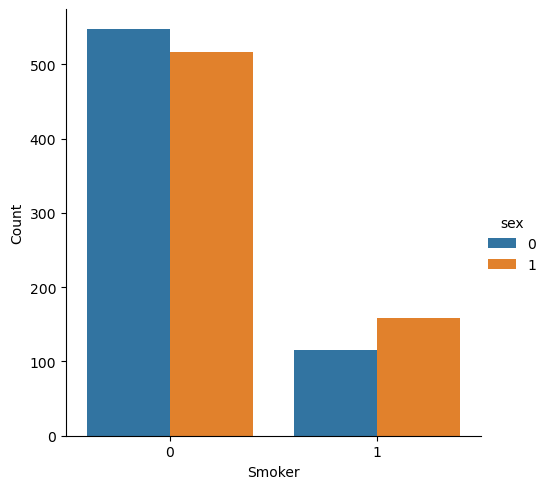

In [12]:
# Relation between Gender and Smoker

plt.figure(figsize=(13,7))
sns.catplot(x='smoker',kind='count',hue='sex',data=data)

plt.xlabel("Smoker")
plt.ylabel('Count')
plt.show()

In [13]:
# Male smokers are more in number than female smoker, so One can assume that medical expence dfro male will be more as compared to frmale

<Axes: xlabel='charges', ylabel='smoker'>

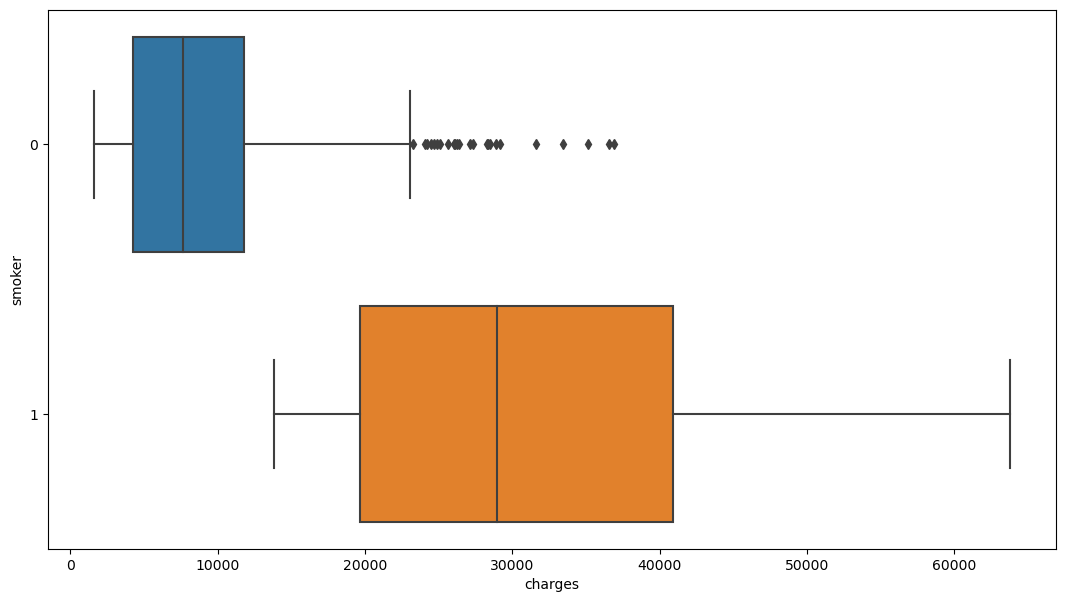

In [14]:
plt.figure(figsize=(13,7))
sns.boxplot(y = 'smoker',x ='charges',data = data[(data.sex==0)],orient='h')

<Axes: xlabel='charges', ylabel='smoker'>

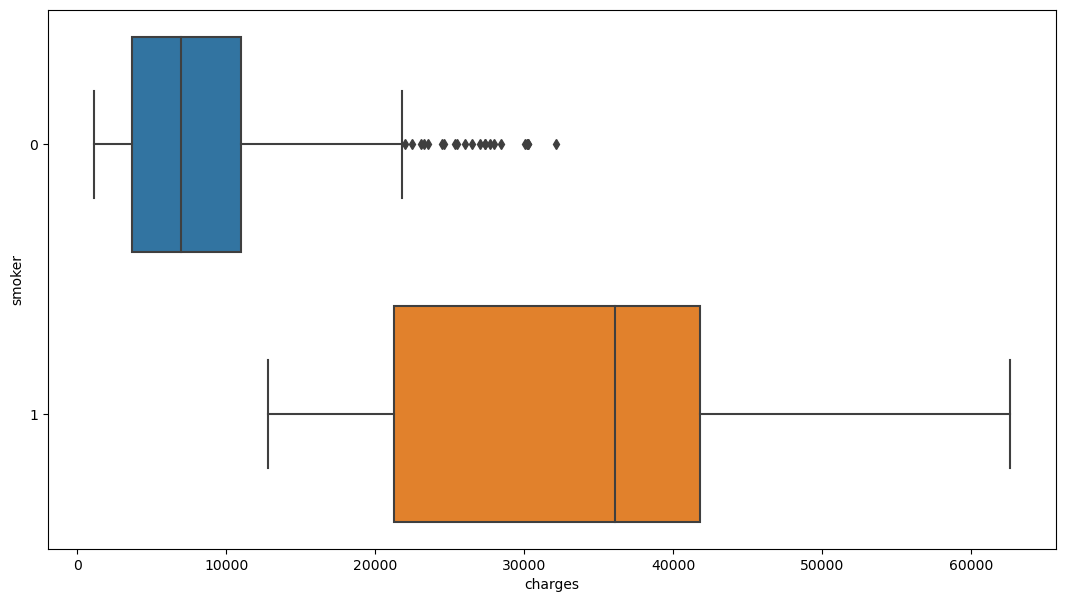

In [15]:
plt.figure(figsize=(13,7))
sns.boxplot(y = 'smoker',x ='charges',data = data[(data.sex==1)],orient='h')

In [16]:
# The assumption is true, that the medical expence of males is greater than that of females. In addition to that the medical 
# expence of smokers is > non-smokers.

In [17]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

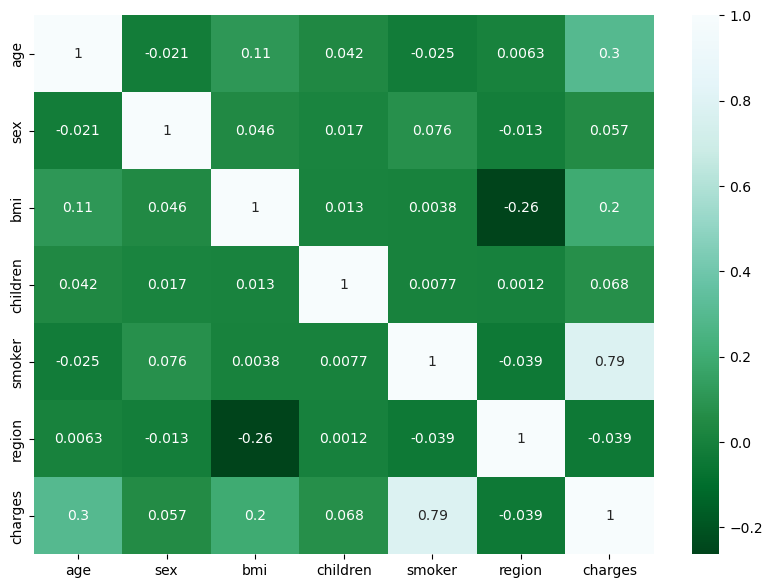

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

In [19]:
# There is no relation between charges and region but a storng relation between smoker and charges meaning that if someone 
# smokes his/her medical charges will be high.
# Also there is a marginal relation between charges and bmi and a very week relation between charges and children,gender
# Age is also to some extent is creating a relation with the charges

#### By observing the plot we can state that smokers has more expences so it has a high impact on insurance charges followed by age and bmi where as region, gender and children has np imptact

<Figure size 1300x700 with 0 Axes>

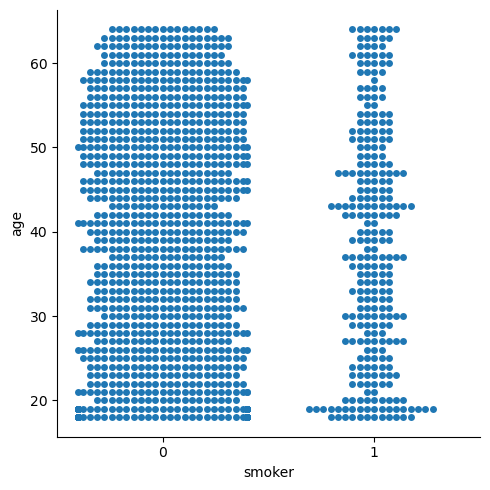

In [20]:
plt.figure(figsize=(13, 7))
sns.catplot(x='smoker',y='age',kind='swarm',data = data)

*From above graph, we can observe that there is a significant number of smokers at the age 19.*

### Multi-Variant Analysis - When we analyse using more than two variables.

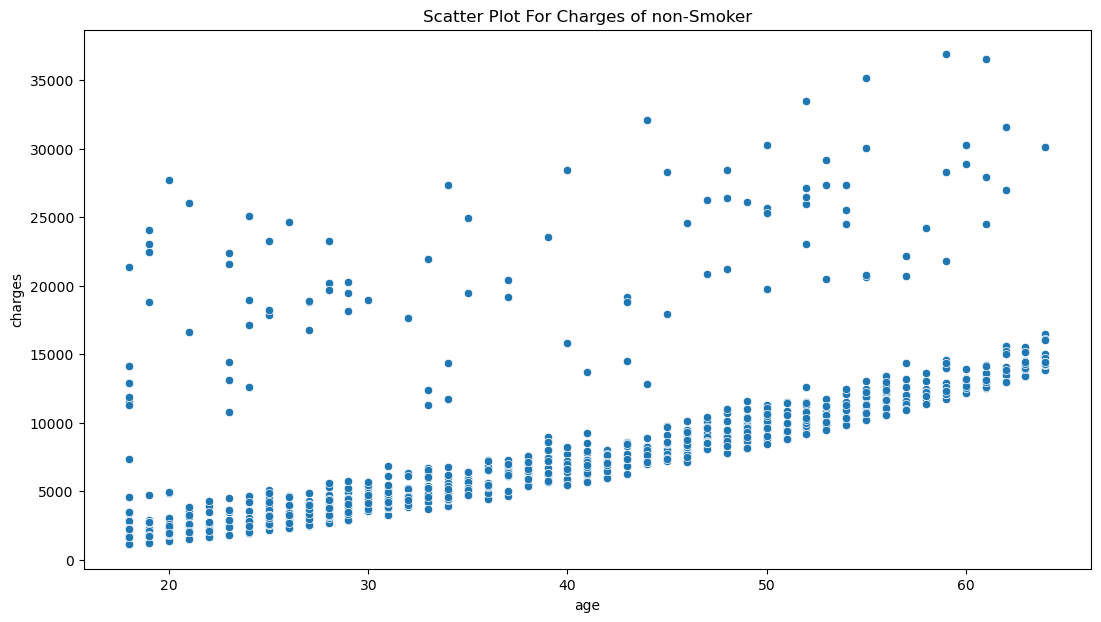

In [21]:
plt.figure(figsize=(13,7))

plt.title("Scatter Plot For Charges of non-Smoker")
sns.scatterplot(x='age',y = 'charges',data=data[(data.smoker==0)])

plt.show()

*Majority of the points shows that he medical expenses increase wiht the agewhich may due to the fact that older people are more prone to illness. But there are some outliers which shows other illness or expences which may lead to increase in medical expenses.*

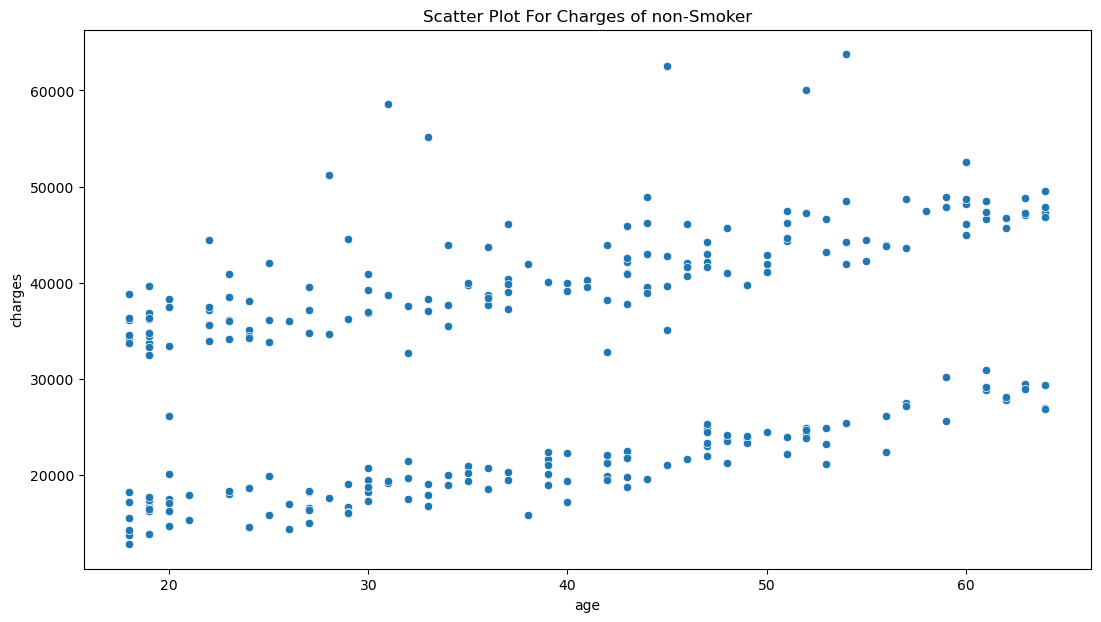

In [22]:
plt.figure(figsize=(13,7))

plt.title("Scatter Plot For Charges of non-Smoker")
sns.scatterplot(x='age',y = 'charges',data=data[(data.smoker==1)])

plt.show()

*In this graph there are two segments, one with high medical expense which may be due to high smoking related illness and other with low medical expense which may be due to age related illness*

Now, in order to get more clear idea we combine both the graphs.

<Figure size 800x1000 with 0 Axes>

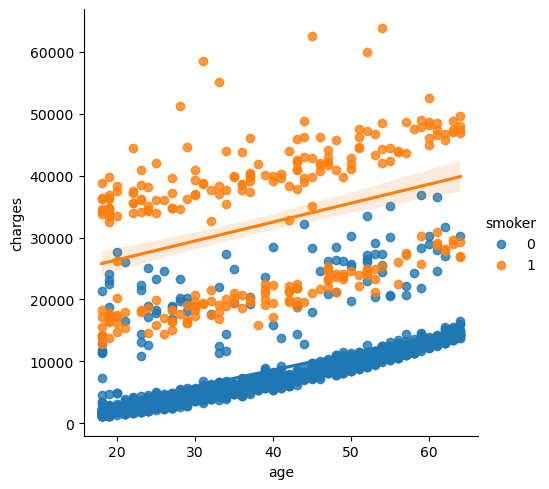

In [23]:
# Age charges distribution.

plt.figure(figsize = (8,10))
sns.lmplot(x='age',y='charges',data = data,hue = 'smoker')
plt.show()

*Now we can clearly undersatnd the difference in the charges wrt age and smoking habits. The medical expense of smoker is higher than that of non smokersirrespective of age. In non-smokers, the cost of treatment increases wiht age which is kind of obvious.*

<Figure size 1300x700 with 0 Axes>

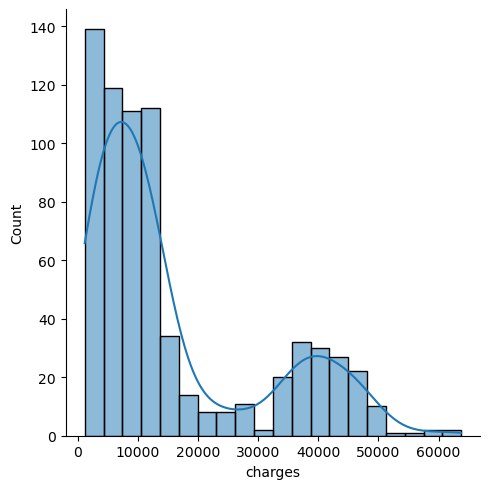

In [24]:
# relation b/w medical BMI and Medical Charges

plt.figure(figsize = (13,7))
sns.displot(data[(data.bmi > 30)]['charges'],kde = True)
plt.show()

<Figure size 1300x700 with 0 Axes>

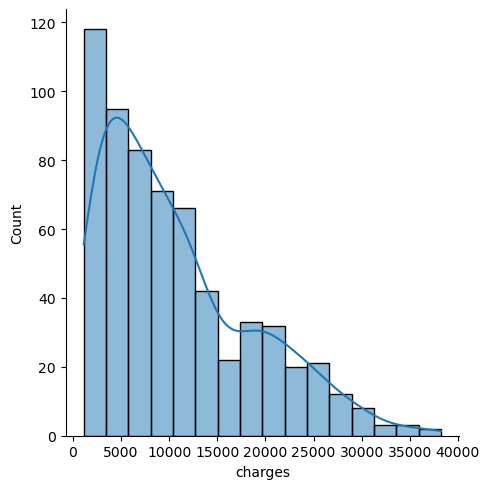

In [25]:
plt.figure(figsize = (13,7))
sns.displot(data[(data.bmi < 30)]['charges'],kde = True)
plt.show()

*Therefore, people with BMI less than 30 are spending less where a people with BMI > 30 are spending more*

In [26]:
data.drop(['region'],axis = 1,inplace = True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## Model Building

### Liner Regression

In [27]:
x = data.drop('charges',axis=1)
y = data.charges
x,y

(      age  sex     bmi  children  smoker
 0      19    0  27.900         0       1
 1      18    1  33.770         1       0
 2      28    1  33.000         3       0
 3      33    1  22.705         0       0
 4      32    1  28.880         0       0
 ...   ...  ...     ...       ...     ...
 1333   50    1  30.970         3       0
 1334   18    0  31.920         0       0
 1335   18    0  36.850         0       0
 1336   21    0  25.800         0       0
 1337   61    0  29.070         0       1
 
 [1338 rows x 5 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

reg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = reg.predict(x_test)
y_pred

array([11457.24748797,  9925.93074028, 37768.54941888, 15853.34679049,
        6939.11972533,  3715.15809068,  1226.51797859, 14013.62531872,
        8801.37793745,  7319.3569299 ,  4273.75316151, 10130.71955326,
        9085.31708787,  4373.32320457, 27814.85680664, 11178.7533822 ,
       11185.96123339,  5630.52468867,  8076.08092103, 26738.70765833,
       33571.19206907, 14028.13563512, 11218.6467869 , 32627.93297826,
        4586.6864    ,  8662.71797281,   909.82505247, 10181.12419998,
        4318.89099156, 10226.29974927,  8827.54515889, 40279.78845676,
       15797.33819958, 14003.57232067, 24541.57502951,  4754.90669146,
       12888.4411817 , 30986.42695074, 33296.10937045,  3923.72690408,
        3729.50340695,  4518.10338943, 30179.67003291, 39152.46681933,
       28159.50615257,  4858.31074493, 11075.11507975,  7719.48440006,
        3314.0509843 , 10750.82941843,  5170.52098751,  3301.78200967,
       33383.67630651, 37846.88608306, 16194.84338063,  6620.18331508,
      

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score= ",r2_score(y_test, y_pred))

MAE: 3987.1986506275825
RMSE: 5678.017317091146
R2 Score=  0.7952171980481992


# Polynomial Regression 

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [34]:
#Transforming the feature to a higher degree
x_train_poly = poly_reg.fit_transform(x_train)

# Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_train_poly,y_train,test_size=0.2,random_state=0)

In [35]:
# Train the Model
plr = LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [36]:
# Meking Predictions
y_pred_pr = plr.predict(x_test)
y_pred_pr

array([33903.67690238, 10214.28309743,  7152.80305978,  6213.54478854,
       10924.28136039,  8997.82286256,  4998.45583226,  4986.12763895,
       12601.42779167,  3750.6165746 , 11383.17211306,  7550.21215394,
       12143.87444733,  4849.84865781, 23327.67744641,  3592.08036244,
       24795.37242715, 10448.12733481,  4005.95192891, 10572.79927813,
        2707.88535245, 11178.97531592,  9956.63243767, 11949.25664265,
        9101.53826142, 33591.67437584,  6159.03150864,  9888.20371195,
       13454.96297563, 12661.12604511,  8147.80598438, 11783.49349467,
       12529.93405018, 14064.00125117,  7975.47266274,  4044.12615162,
       21253.85062212,  4477.99656574,  2182.96994953,  2899.76530133,
        6530.21994467,  9318.34499583, 11925.96020543,  3428.83421165,
       12927.26263588, 15072.61620179, 11568.80515378, 12677.01284572,
        2818.14868157, 13685.13131328,  3021.90120592,  3815.535328  ,
       12983.16357927,  2641.17037299, 41807.13447464,  4175.27816624,
      

In [37]:
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pr)))
print("R2 Score= ",r2_score(y_test, y_pred_pr))

MAE: 3238.6785371272586
RMSE: 5409.076526902022
R2 Score=  0.7915151210260605


# Making A Prediction System

In [38]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [39]:
# Input Values
age = 21
sex = 1
bmi = 27
children = 0
smoker = 1

In [40]:
# Predicting the Charges
charge = reg.predict([[age,sex,bmi,children,smoker]])
print('The charges of this new patient is $',charge)

The charges of this new patient is $ [25833.17904279]


## OLS MODEL: - 
***Ordinary List Square.***



***It is used to estimate the value of weights and bias.***

In [41]:
import statsmodels.api as sm

In [42]:
# Add constants to predicator [Features] variables.

X = sm.add_constant(x)

In [43]:
result = sm.OLS(y,X).fit()

# Printing the summary variable.

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:41:42   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex         -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
smoker      2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [45]:
# Ridge Regression

Ridgemodel = Ridge()
Ridgemodel

Ridge()

In [46]:
Ridgemodel.fit(x_train, y_train)

Ridge()

In [47]:
# Testing the Model.

r_pred = Ridgemodel.predict(x_test)
r2_score(y_test,r_pred)

0.7910371539658424